In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from bitcoin import engine
df = engine.load_data('BTC-EUR')

df[df.isnull().any(axis=1)]

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
1657,1520372160,NaN,NaN,NaN,NaN,0.654339,0.025497,865323.0,-0.010816,0.081297
1709,1520375280,NaN,8680.46,8680.46,8680.46,0.371350,0.024812,872689.0,0.006467,0.094706


In [2]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
count,2.262000e+03,2260.000000,2261.000000,2261.000000,2261.000000,2262.000000,2262.000000,2.262000e+03,2262.000000,2262.000000
mean,1.520340e+09,8946.692279,8950.110770,8948.462689,8948.390831,1.210724,0.052982,8.564956e+05,0.039745,0.119376
std,3.934646e+04,275.181231,273.778234,274.505544,274.382988,3.262533,0.027323,2.387969e+05,0.038126,0.045904
min,1.520272e+09,8450.000000,8461.000000,8461.000000,8450.010000,0.001000,-0.015150,3.329640e+05,-0.017144,0.025257
25%,1.520306e+09,8706.140000,8714.530000,8708.210000,8710.700000,0.100000,0.028504,7.158448e+05,0.005665,0.085257
50%,1.520340e+09,8864.140000,8865.520000,8865.000000,8865.010000,0.342639,0.055760,8.477085e+05,0.035227,0.121230
75%,1.520374e+09,9169.270000,9169.410000,9169.390000,9169.390000,1.131088,0.069678,1.046668e+06,0.083003,0.160463
max,1.520408e+09,9399.000000,9399.000000,9399.000000,9399.000000,90.488639,0.118355,1.365095e+06,0.102910,0.192206


In [3]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
time,1.000000,-0.937098,-0.938952,-0.938128,-0.938205,0.059766,-0.502404,-0.590401,-0.788984,0.327421
low,-0.937098,1.000000,0.999530,0.999689,0.999790,-0.127227,0.494828,0.622517,0.781161,-0.248832
high,-0.938952,0.999530,1.000000,0.999813,0.999790,-0.107487,0.494706,0.622311,0.782839,-0.250633
open,-0.938128,0.999689,0.999813,1.000000,0.999639,-0.112052,0.494745,0.622081,0.782509,-0.249305
close,-0.938205,0.999790,0.999790,0.999639,1.000000,-0.116846,0.495129,0.622523,0.781995,-0.249851
volume,0.059766,-0.127227,-0.107487,-0.112052,-0.116846,1.000000,0.005998,-0.155021,-0.018384,-0.048828
tw_sentiment,-0.502404,0.494828,0.494706,0.494745,0.495129,0.005998,1.000000,0.190395,0.426702,0.100827
tw_followers,-0.590401,0.622517,0.622311,0.622081,0.622523,-0.155021,0.190395,1.000000,0.491016,-0.047236
reddit_sentiment,-0.788984,0.781161,0.782839,0.782509,0.781995,-0.018384,0.426702,0.491016,1.000000,-0.483478
google_sentiment,0.327421,-0.248832,-0.250633,-0.249305,-0.249851,-0.048828,0.100827,-0.047236,-0.483478,1.000000


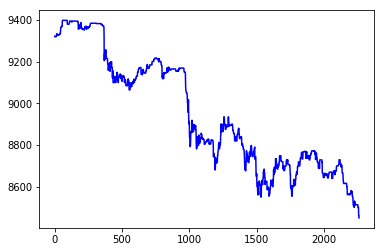

In [4]:
plt.plot(df['close'], 'b')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x102583dd8>,
      dtype=object)

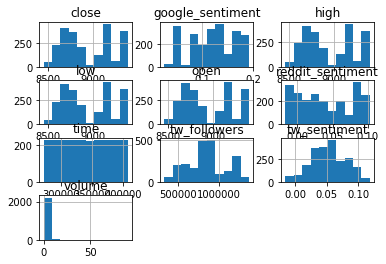

In [5]:
df.hist()

In [6]:
X_train, X_test, y_train, y_test, scaler_x, scaler_y = engine.prepare(df)

In [7]:
model, history = engine.train(X_train, X_test, y_train, y_test)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            164800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
__________

([<matplotlib.lines.Line2D at 0x11b568208>], 'g')

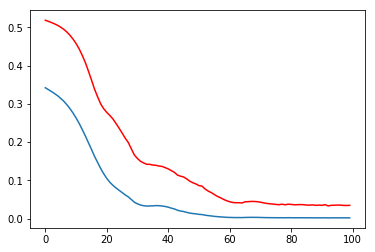

In [8]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error']), 'g'

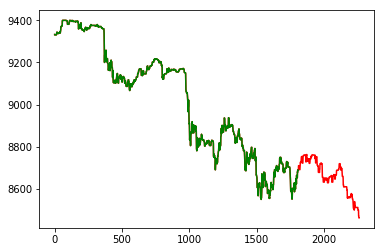

In [9]:
import numpy as np

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

y_predict_train = model.predict(X_train)
y_predict_train = scaler_y.inverse_transform(y_predict_train)

y_predict_test = model.predict(X_test)
y_predict_test = scaler_y.inverse_transform(y_predict_test)

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_predict_train, y_predict_test), axis=0)

plt.plot(y, 'r')
plt.plot(y_predict_train, 'g')

In [10]:
engine.test_order_percent(df, model, scaler_x, scaler_y)

1810 / 452 ---> predicted Order.DOWN - real Order.STAY
1826 / 452 ---> predicted Order.UP - real Order.STAY
1827 / 452 ---> predicted Order.DOWN - real Order.STAY
1850 / 452 ---> predicted Order.UP - real Order.DOWN
1863 / 452 ---> predicted Order.UP - real Order.STAY
1866 / 452 ---> predicted Order.DOWN - real Order.STAY
1870 / 452 ---> predicted Order.UP - real Order.STAY
1879 / 452 ---> predicted Order.DOWN - real Order.STAY
1880 / 452 ---> predicted Order.UP - real Order.STAY
1884 / 452 ---> predicted Order.DOWN - real Order.STAY
1892 / 452 ---> predicted Order.DOWN - real Order.UP
1903 / 452 ---> predicted Order.DOWN - real Order.STAY
1905 / 452 ---> predicted Order.DOWN - real Order.STAY
1914 / 452 ---> predicted Order.UP - real Order.STAY
1923 / 452 ---> predicted Order.DOWN - real Order.STAY
1930 / 452 ---> predicted Order.DOWN - real Order.STAY
1931 / 452 ---> predicted Order.UP - real Order.STAY
1944 / 452 ---> predicted Order.DOWN - real Order.STAY
1945 / 452 ---> predicted 

1.2314732751889288

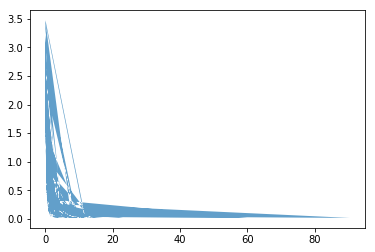

In [11]:
from sklearn.neighbors import KernelDensity
import numpy as np

X = df['volume'].values.reshape(-1, 1)

kde = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(X)
log_dens = kde.score_samples(X)
plt.fill(X, np.exp(log_dens), alpha=0.7)

kde.score(0.01)